In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
soubory = glob.glob("data/*.csv") 
dataframes = []

for f in soubory:
    df = pd.read_csv(f)
    dataframes.append(df)

df_all = pd.concat(dataframes, ignore_index=True)
df_all['hodnota'] = pd.to_numeric(df_all['hodnota'], errors='coerce').fillna(0)

In [3]:
for f in soubory:
    df = pd.read_csv(f)
    dataframes.append(df)
df_all = pd.concat(dataframes, ignore_index=True)
df_all['hodnota'] = pd.to_numeric(df_all['hodnota'], errors='coerce').fillna(0)


In [4]:
df_cz_total = df_all[
    (df_all['vuzemi_cis'] == 97) &       
    (df_all['pohlavi_txt'].isna()) &     
    (df_all['vek_txt'].isna()) &         
    (df_all['stobcan_txt'].isna())       
].copy().sort_values('rok')

df_cz = df_all[
    (df_all['vuzemi_cis'] == 97) & 
    (df_all['pohlavi_txt'].isna()) & 
    (df_all['vek_txt'].isna()) &
    (df_all['stobcan_txt'].notna())      
].copy()

max_rok = df_all['rok'].max()
df_regions = df_all[
    (df_all['rok'] == max_rok) &
    (df_all['vuzemi_cis'] == 101) &      
    (df_all['pohlavi_txt'].isna()) &
    (df_all['vek_txt'].isna())
].copy()

df_regions_agg = df_regions.groupby('kraj_txt')['hodnota'].sum().reset_index()

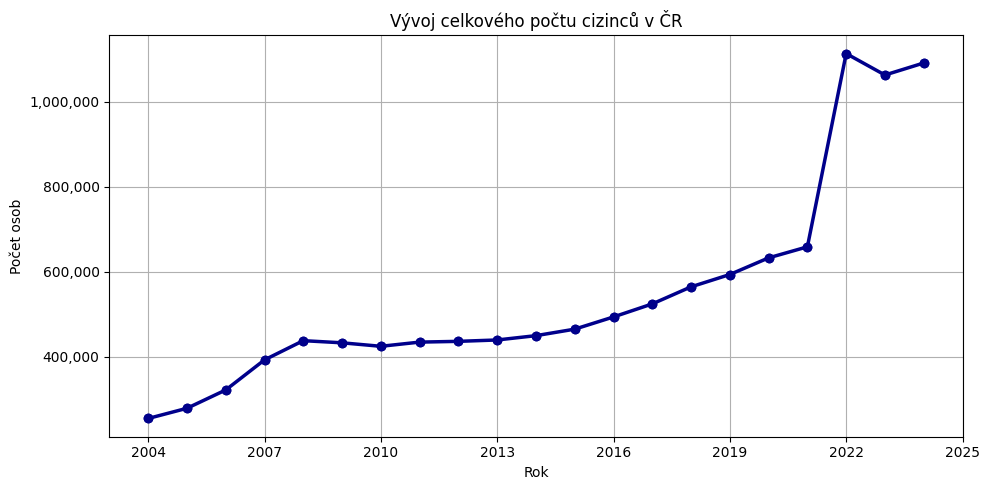

In [5]:
# Vývoj celkového počtu cizinců
fig, ax = plt.subplots(figsize=(10, 5))

df_cz_total.plot(x='rok', y='hodnota', kind='line', ax=ax, 
                    marker='o', linewidth=2.5, color='darkblue', legend=False)

ax.set_title('Vývoj celkového počtu cizinců v ČR')
ax.set_ylabel('Počet osob')
ax.set_xlabel('Rok')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.tight_layout()
plt.show()

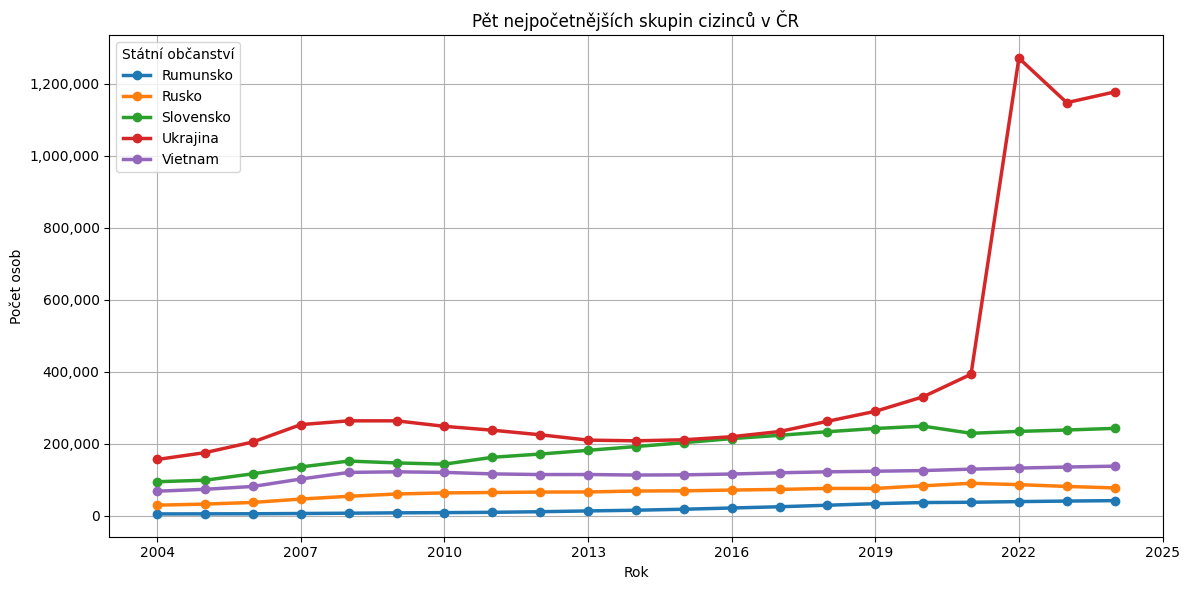

In [6]:
# Pět nejpočetnějších skupin cizinců
top_zeme = df_cz[df_cz['rok'] == max_rok].groupby('stobcan_txt')['hodnota'].sum().sort_values(ascending=False).head(5).index.tolist()

df_top = df_cz[df_cz['stobcan_txt'].isin(top_zeme)]
df_top_pivot = df_top.pivot_table(index='rok', columns='stobcan_txt', values='hodnota', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 6))

df_top_pivot.plot(kind='line', ax=ax, linewidth=2.5, marker='o')

ax.set_title('Pět nejpočetnějších skupin cizinců v ČR')
ax.set_ylabel('Počet osob')
ax.set_xlabel('Rok')
ax.legend(title='Státní občanství')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.tight_layout()
plt.show()

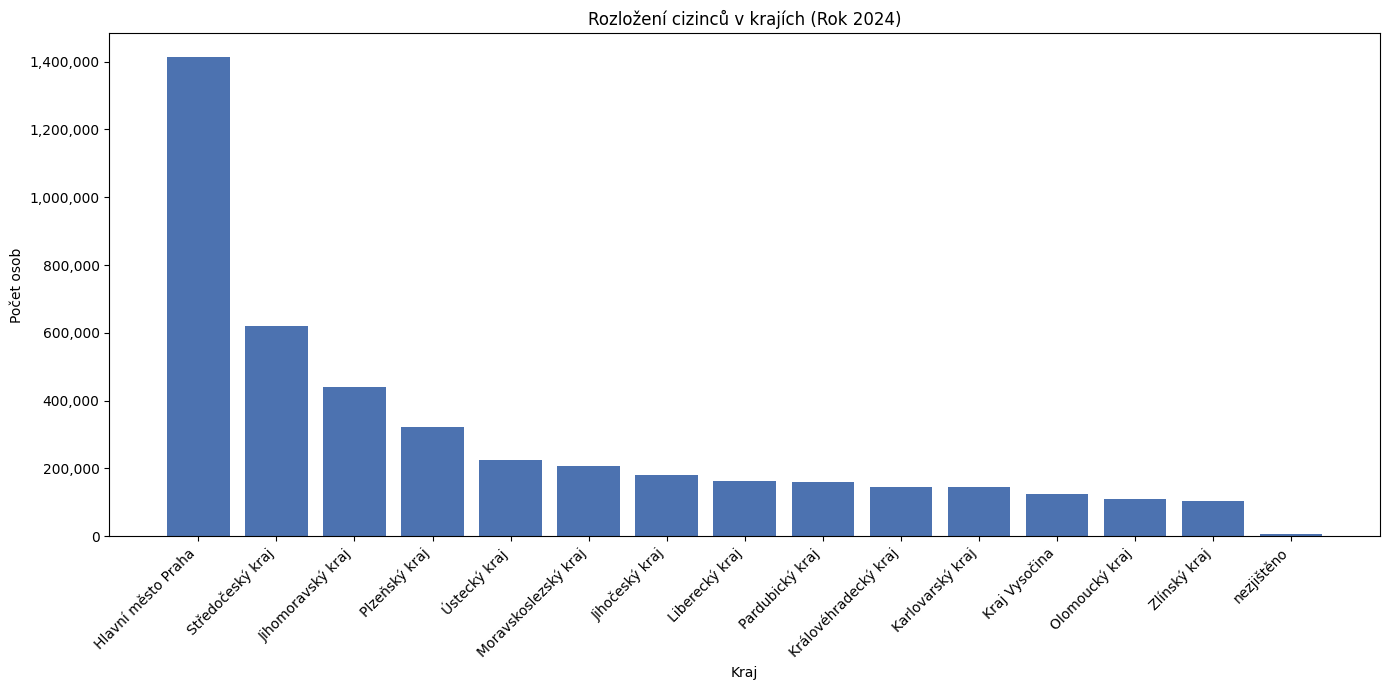

In [7]:
# Srovnání krajů
df_regions_sorted = df_regions_agg.sort_values('hodnota', ascending=False)

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(df_regions_sorted['kraj_txt'], df_regions_sorted['hodnota'], color='#4c72b0') 

ax.set_title(f'Rozložení cizinců v krajích (Rok {max_rok})')
ax.set_ylabel('Počet osob')
ax.set_xlabel('Kraj')

plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()  